<a href="https://www.kaggle.com/code/ayamoniem22/final-model?scriptVersionId=129822973" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

importing all the important libraries

In [1]:
import os
import cv2
from cv2 import imread, resize
import numpy as np     
import pandas as pd   
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications.densenet import DenseNet121, preprocess_input
from keras import regularizers
from keras.utils import img_to_array
from tensorflow.keras.utils import load_img

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install split_folders
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import splitfolders

split dataset to train and test   
use 70% for training, and 30% for validation

In [3]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/test')

loc ="/kaggle/input/7skin-dataset/skin_data" 
splitfolders.ratio(loc,output ="output",seed=42, ratio = (0.70, 0.30))

Copying files: 3136 files [00:25, 122.50 files/s]


use pre-trained model dense-net121

In [4]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step


using data agmentation and using flow_from_directory to load data from directory

In [5]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range= 20,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
# train_datagen.fit(X_train)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# val_datagen.fit(X_test)
train_generator = train_datagen.flow_from_directory('/kaggle/working/output/train',
   target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

validation_generator = val_datagen.flow_from_directory('/kaggle/working/output/val',
   target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 2195 images belonging to 7 classes.
Found 941 images belonging to 7 classes.


In [6]:
history = model.fit(train_generator ,
    epochs=20,
    validation_data=validation_generator,batch_size=64
)

Epoch 1/20
35/35 [==============================] - 64s 1s/step - loss: 0.8642 - accuracy: 0.6852 - val_loss: 0.3618 - val_accuracy: 0.8693
Epoch 2/20
35/35 [==============================] - 40s 1s/step - loss: 0.4073 - accuracy: 0.8442 - val_loss: 0.3180 - val_accuracy: 0.8948
Epoch 3/20
35/35 [==============================] - 40s 1s/step - loss: 0.3290 - accuracy: 0.8793 - val_loss: 0.2853 - val_accuracy: 0.8948
Epoch 4/20
35/35 [==============================] - 39s 1s/step - loss: 0.2768 - accuracy: 0.8893 - val_loss: 0.3034 - val_accuracy: 0.8916
Epoch 5/20
35/35 [==============================] - 40s 1s/step - loss: 0.2729 - accuracy: 0.9021 - val_loss: 0.3480 - val_accuracy: 0.8735
Epoch 6/20
35/35 [==============================] - 40s 1s/step - loss: 0.2421 - accuracy: 0.9052 - val_loss: 0.2472 - val_accuracy: 0.9203
Epoch 7/20
35/35 [==============================] - 40s 1s/step - loss: 0.2188 - accuracy: 0.9226 - val_loss: 0.2293 - val_accuracy: 0.9214
Epoch 8/20
35/35 [==

In [7]:
model.evaluate(validation_generator)

15/15 [==============================] - 6s 371ms/step - loss: 0.2421 - accuracy: 0.9256


[0.24205997586250305, 0.9256110787391663]

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
y_pred=model.predict(validation_generator)

15/15 [==============================] - 8s 351ms/step


In [9]:
y_pred2=np.argmax(y_pred, axis=1)
#print(y_pred2)
y_test=validation_generator.classes
# print(y_test)
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

In [10]:
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np

from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle
classes = ['Basal Cell Carcinoma (BCC)','Melanocytic Nevi (NV)','Melanoma','Monkey Pox','Ringworm','Warts Molluscum,Viral Infections','normal']
confusion_matrix=classification_report(y_test,y_pred2,target_names=classes)
print(confusion_matrix)

                                  precision    recall  f1-score   support

      Basal Cell Carcinoma (BCC)       0.99      0.93      0.96       150
           Melanocytic Nevi (NV)       0.83      0.92      0.87       150
                        Melanoma       0.93      0.87      0.90       150
                      Monkey Pox       0.95      0.90      0.92        41
                        Ringworm       0.97      0.89      0.93       150
Warts Molluscum,Viral Infections       0.88      0.99      0.93       150
                          normal       0.99      0.95      0.97       150

                        accuracy                           0.93       941
                       macro avg       0.93      0.92      0.93       941
                    weighted avg       0.93      0.93      0.93       941



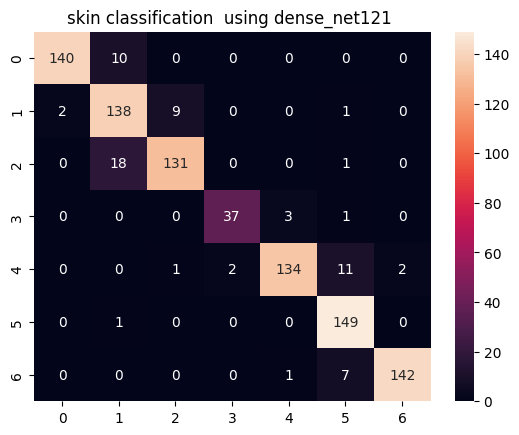

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin classification  using dense_net121 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

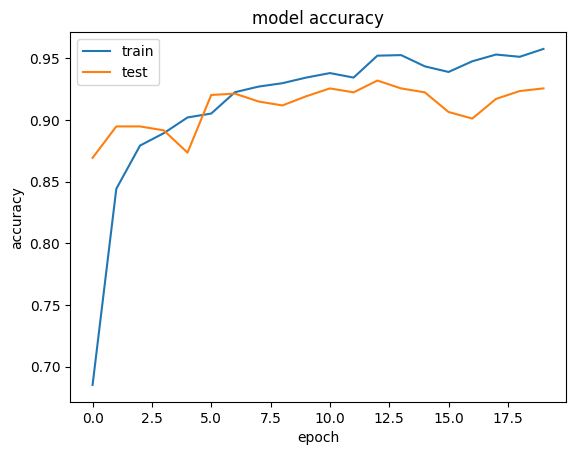

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

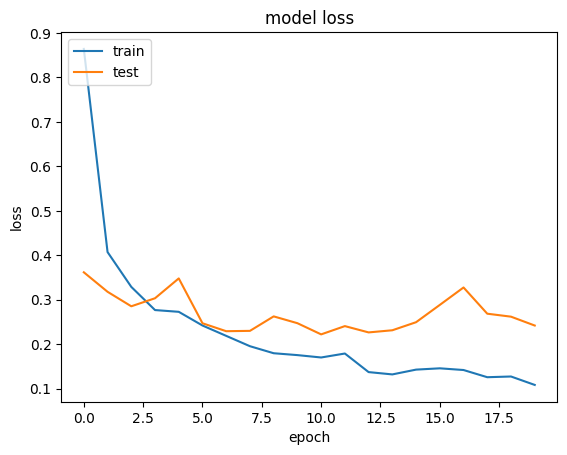

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save('7skin_model.h5')

In [15]:
test_image = load_img('/kaggle/input/7skin-dataset/skin_data/Monkey Pox/M03_01.jpg', target_size=(224, 224))
test_image = img_to_array(test_image) / 255  # < - division by 255
test_image = np.expand_dims(test_image, axis=0)

In [16]:
from keras.models import Sequential, load_model
test_model = load_model('/kaggle/working/7skin_model.h5')

In [17]:
prediction = test_model.predict(test_image)
max_pred = np.max(prediction)
t = 0.95
if max_pred < t:
    print("other diseases")
else:
    print(classes[(np.argmax(prediction))])

1/1 [==============================] - 3s 3s/step
Monkey Pox
